# LBP Based Style Classifer

### Import Statments

In [1]:
import numpy as np

from style_classifier_helper import *
from tqdm import tqdm
import random
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from BitVector import *

### Load Training and Testing Image Data
* train_img_list is a list of all the training images stored as np.ndarry
* train_label_list is a list of the labels for the training images
* test_img_list is a list of all the testing images stored as np.ndarry
* test_label_list is a list of the labels for the test images

In [2]:
training_directory = "/home/jo_wang/Desktop/ECE661/HW07/data/training"
test_directory = "/home/jo_wang/Desktop/ECE661/HW07/data/testing"

train_img_list, train_label_list = loadGrayImages(training_directory)
test_img_list, test_label_list = loadGrayImages(test_directory)

assert(len(train_img_list) == len(train_label_list))
assert(len(test_img_list) == len(test_label_list))
assert(len(train_img_list) == 920)
assert(len(test_img_list) == 200)

In [6]:
train_features = np.zeros((1,10))
test_features = np.zeros((1,10))

for img in tqdm(train_img_list):
    histogram = lbp_encode(img)
    histogram_as_list = list()
    for key, value in histogram.items():
        histogram_as_list.append(value)
    features = np.asarray(histogram_as_list)
    features = np.resize(features, (1,10))
    train_features = np.vstack((train_features, features))

for img in tqdm(test_img_list):
    histogram = lbp_encode(img)
    histogram_as_list = list()
    for key, value in histogram.items():
        histogram_as_list.append(value)
    features = np.asarray(histogram_as_list)
    features = np.resize(features, (1,10))
    test_features = np.vstack((test_features, features))

assert(train_features[1:,:].shape == (920, 10))
assert(test_features[1:,:].shape == (200, 10))


100%|██████████| 200/200 [02:24<00:00,  1.38it/s]


Accuracy: 0.73


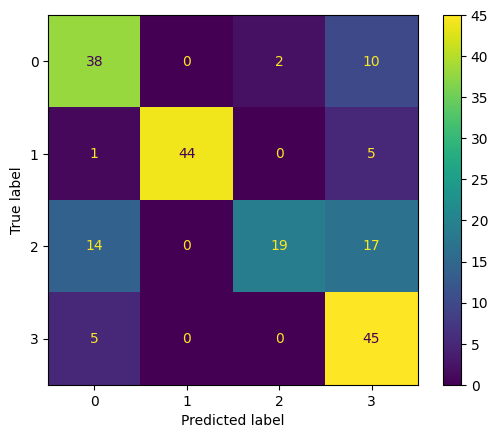

In [8]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_features[1:,:], train_label_list)
texture_predict = clf.predict(test_features[1:,:])
print("Accuracy:",metrics.accuracy_score(test_label_list, texture_predict))
ConfusionMatrixDisplay.from_estimator(clf, test_features[1:,:], test_label_list)